In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.model_selection   # For cross_val_score, GridSearchCV, RandomizedSearchCV
import pandas as pd
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
import importlib
def train_estimators(X, y, estimator_type, param_name, param_vals, **kwargs):
    train_estimator = [] 
    s = "%s" %kwargs #converts kwargs to string 
    s = str(estimator_type).split("'")[1]      #gets import_module which is sklearn.tree 
    position1 = (s.find("."))
    position2 = (s.find(".",position1+1))
    
    for i in range(len(param_vals)):
        model_class = getattr(importlib.import_module(s[:position2]),(str(estimator_type).split(".")[-1][:-2]))
        kwargs[param_name] = param_vals[i] #adds param_name into the kwargs dictionnary
        model = model_class(**kwargs)  # instantiates the model
        train_estimator.append(model.fit(X,y))
        #print(f' Training {train_estimator[i]}...')
    return train_estimator

def score_estimators(X, y, estimators):
    score = []
    for i in range(np.array(estimators).shape[0]):
         score.append(estimators[i].score(X,y))
    return score

def plot_estimator_scores(estimators, param_name, param_vals, X_trn, ytrn, X_val, yval, X_test, ytest, name):
    train_score,val_score,test_score = [],[],[]
    train_score = np.average([score_estimators(X_trn,ytrn,e) for e in estimators], axis=1).tolist()
    val_score = np.average([score_estimators(X_val,yval,e) for e in estimators], axis=1).tolist()
    test_score = np.average([score_estimators(X_test,ytest,e) for e in estimators], axis=1).tolist()
    #print(np.array([score_estimators(X_test,ytest,e) for e in estimators]))
    #print(test_score)
    #finding best scores  
    best_val = max(np.array(val_score))
    index = val_score.index(best_val)
    
    best_train = train_score[index]
    best_test = test_score[index]
    
    min_score = np.concatenate((train_score,val_score,test_score))
    best_score = np.concatenate((train_score,val_score,test_score))
    #plotting code
    #makes sure the x axis points are evenly spaced
    locs, labels = plt.xticks() 
    plt.plot(locs,np.array(train_score).ravel(),'-o',color='green',label='train = %.3f' %(best_train))
    plt.plot(locs,val_score,'-o',color='red',label='validate = %.3f' %(best_val))
    plt.plot(locs,test_score,linestyle='dotted',color='black',label='test = %.3f' %(best_test))
    
    plt.scatter(locs[index],best_val, s=150, marker='x',color="red")
    plt.xticks(locs,param_vals)
    #plt.ylim(min(min_score)-0.02,max(best_score)+0.01)
    plt.ylim(0,1)
    plt.legend(loc="center left")
    plt.xlabel(param_name)
    plt.ylabel("score")
    plt.title(f'({name}) {estimators[0].__class__.__name__} score vs {param_name}')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.model_selection   # For cross_val_score, GridSearchCV, RandomizedSearchCV
import pandas as pd
import warnings
plt.rcParams.update({'figure.max_open_warning': 0})
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

estimators = {}

def trainForY(X, data, yname):
    print('===========================================================')
    print(yname)
    estimators[yname] = {}
    
    y = data[yname]
    y = y.values
    tscv = TimeSeriesSplit()
    #(trn_1, tst_1), (trn_2, tst_2), (trn_3, tst_3), (trn_4, tst_4), (trn_5, tst_5) = tscv.split(X)
    #X_trn_1, X_val_1, y_trn_1, y_val_1 = sklearn.model_selection.train_test_split(trn_1, trn_1, test_size=0.25, random_state=0)
    #X_trn_2, X_val_2, y_trn_2, y_val_2 = sklearn.model_selection.train_test_split(trn_2, trn_2, test_size=0.25, random_state=0)
    ###X_trn_3, X_val_3, y_trn_3, y_val_3 = sklearn.model_selection.train_test_split(trn_3, trn_3, test_size=0.25, random_state=0)
    ##X_trn_4, X_val_4, y_trn_4, y_val_4 = sklearn.model_selection.train_test_split(trn_4, trn_4, test_size=0.25, random_state=0)
    #X_trn_5, X_val_5, y_trn_5, y_val_5 = sklearn.model_selection.train_test_split(trn_5, trn_5, test_size=0.25, random_state=0)
    
    #cv_results = cross_val_score( sklearn.linear_model.LogisticRegression(), X, y, cv=[[X_trn_1, y_trn_1], [X_trn_2, y_trn_2]], scoring='r2')
    #print(cv_results)
    #return
    

    tree_estimators =  [[], [], [], [], [], []]
    forest =  [[], [], [], [], [], []]
    logistic =  [[], [], [], [], [], []]
    svm =  [[], [], [], [], [], []]
    
    warnings.filterwarnings('ignore', 'Solver terminated early.*')
    it = 1
    print(f'Total length: {len(X)}')
    for train_index, test_index in tscv.split(X):
        print('---------------------------')
        print(f'Iteration {it}')
        it += 1
        X_trn, X_tst = X[train_index], X[test_index]
        y_trn, y_tst = y[train_index], y[test_index]   
        val_split = round(len(X_trn)*.75)
        X_val = X_trn[val_split:]
        X_trn = X_trn[:val_split]
        y_val = y_trn[val_split:]
        y_trn = y_trn[:val_split]
        print(f'Training length: {len(X_trn)}')
        print(f'Validation length: {len(X_val)}')
        print(f'Test length: {len(X_tst)}')
        #X_trn, X_val, y_trn, y_val = sklearn.model_selection.train_test_split(X_trn, y_trn, test_size=0.25, random_state=0)
        
        scaler = sklearn.preprocessing.StandardScaler()
        X_trn = scaler.fit_transform(X_trn.reshape(X_trn.shape[0],-1))
        X_test = scaler.transform(X_tst.reshape(X_tst.shape[0],-1))
        X_val = scaler.transform(X_val.reshape(X_val.shape[0],-1))
        
        print("trees...")
        tree_estimators_temp = train_estimators(X_trn, y_trn, sklearn.tree.DecisionTreeClassifier, 'max_depth', [1, 5, 10, 20, 50, 100], splitter='random', random_state=0)
        for i, est in enumerate(tree_estimators_temp):
            tree_estimators[i].append(est)
        
        print("forests...")
        forest_temp = train_estimators(X_trn, y_trn, sklearn.ensemble.RandomForestClassifier, 'max_depth', [1, 5, 10, 20, 50, 100], random_state=0)
        for i, est in enumerate(forest_temp):
            forest[i].append(est)
            
        print("logistic...")
        logistic_temp = train_estimators(X_trn, y_trn, sklearn.linear_model.LogisticRegression, 'C', [1e-05, 0.0001, 0.001, 0.01, 0.1,1.0], max_iter=10000,random_state=0)
        for i, est in enumerate(logistic_temp):
            logistic[i].append(est)
            
        print("svm...")
        svm_temp = train_estimators(X_trn, y_trn, sklearn.svm.SVC, 'C', [0.01, 0.1,1.0, 10.0, 100.0,1000.0], gamma=0.001,max_iter=100,random_state=0)
        for i, est in enumerate(svm_temp):
            svm[i].append(est)
       

    estimators[yname]['tree'] = tree_estimators
    estimators[yname]['forest'] = forest
    estimators[yname]['logistic'] = logistic
    estimators[yname]['svm'] = svm
    fig = plt.figure(figsize=(20,10))
    fig.suptitle(yname)
    fig.add_subplot(2,2,1)
    plot_estimator_scores(tree_estimators,'max_depth',[1, 5, 10, 20, 50, 100], X_trn, y_trn, X_val, y_val, X_tst, y_tst, 'Tree')
    fig.add_subplot(2,2,2)
    plot_estimator_scores(forest,'max_depth',[1, 5, 10, 20, 50, 100], X_trn, y_trn, X_val, y_val, X_tst, y_tst, 'Forest')
    fig.add_subplot(2,2,3)
    plot_estimator_scores(logistic,'C',[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0], X_trn, y_trn, X_val, y_val, X_tst, y_tst, 'Logististic')
    fig.add_subplot(2,2,4)
    plot_estimator_scores(svm,'C',[0.01, 0.1,1.0, 10.0, 100.0,1000.0], X_trn, y_trn, X_val, y_val, X_tst, y_tst, 'SVM')


def trainFromFile(file, yname):
    estimators ={}
    data = pd.read_csv(file)
    
    #data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
    #data = data.dropna(axis=1)
    #for col in data.columns:
    #    print(col)
    X = data.drop(["date","ticker", 'close', 'today_close',
                   "tomorrw_is_buy","tomorrow_is_strong_buy", "tomorrow_increase","tomorrow_close",
                   "week_is_buy","week_is_strong_buy",  "week_increase",
                   "4week_is_buy", "4week_close", "4week_is_strong_buy"],axis=1)
    #X = data.drop(["date","ticker"],axis=1)
    #print(X.head())
    
    for i, col in enumerate(X.columns):
        print(str(i) + ': ' + col)
    X = X.values
    
    
    trainForY(X, data, yname)


In [4]:
ests = [None] * 16

0: score_neg
1: score_neu
2: score_pos
3: score_compound
4: parent_score_neg
5: parent_score_neu
6: parent_score_pos
7: parent_score_compound
8: score
9: parent_score
10: submission_score
11: is_root
12: submission_ratio
13: parent_ratio
14: num_replies
15: day_increase
16: volume
tomorrw_is_buy
Total length: 2666
---------------------------
Iteration 1
Training length: 334
Validation length: 112
Test length: 444
trees...
forests...
logistic...
svm...
---------------------------
Iteration 2
Training length: 668
Validation length: 222
Test length: 444
trees...
forests...
logistic...
svm...
---------------------------
Iteration 3
Training length: 1000
Validation length: 334
Test length: 444
trees...
forests...
logistic...
svm...
---------------------------
Iteration 4
Training length: 1334
Validation length: 444
Test length: 444
trees...
forests...
logistic...
svm...
---------------------------
Iteration 5
Training length: 1666
Validation length: 556
Test length: 444
trees...
forests...


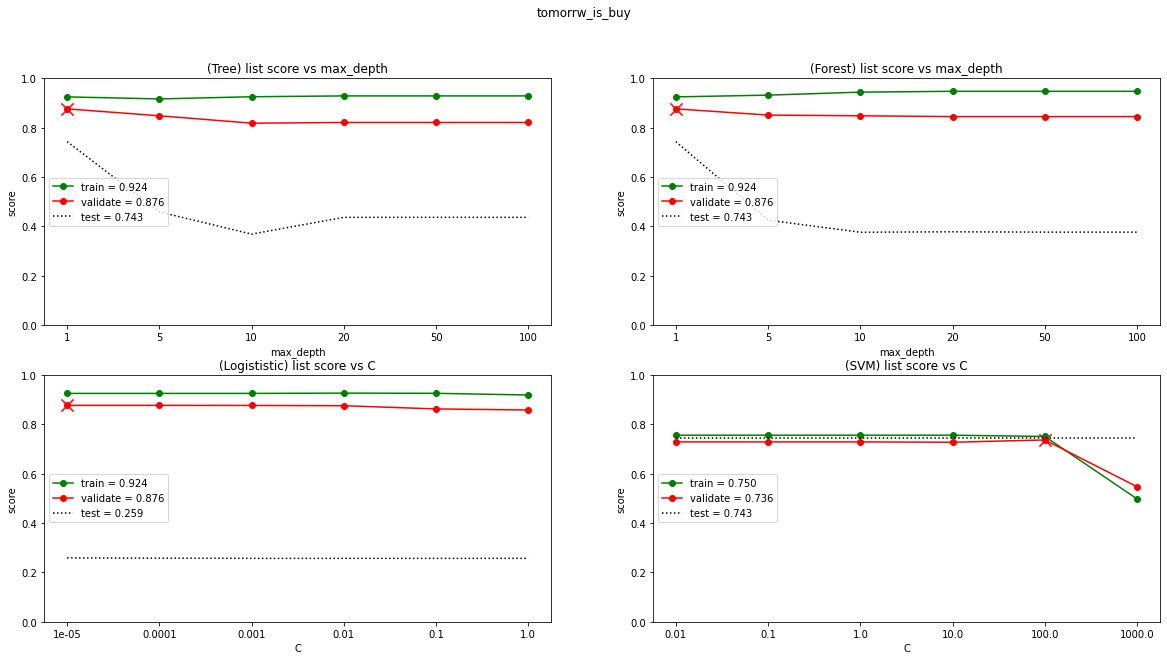

In [10]:
trainFromFile('out.csv', 'tomorrw_is_buy')
ests[0] = estimators

In [ ]:
trainFromFile('out.csv', 'tomorrow_is_strong_buy')
ests[1] = estimators

0: score_neg
1: score_neu
2: score_pos
3: score_compound
4: parent_score_neg
5: parent_score_neu
6: parent_score_pos
7: parent_score_compound
8: score
9: parent_score
10: submission_score
11: is_root
12: submission_ratio
13: parent_ratio
14: num_replies
15: close
16: day_increase
17: volume
18: today_close
week_is_buy
Total length: 401598
---------------------------
Iteration 1
Training length: 50200
Validation length: 16733
Test length: 66933
trees...
forests...
logistic...
svm...
---------------------------
Iteration 2
Training length: 100400
Validation length: 33466
Test length: 66933
trees...
forests...
logistic...
svm...
---------------------------
Iteration 3
Training length: 150599
Validation length: 50200
Test length: 66933
trees...
forests...
logistic...
svm...
---------------------------
Iteration 4
Training length: 200799
Validation length: 66933
Test length: 66933
trees...
forests...
logistic...
svm...
---------------------------
Iteration 5
Training length: 250999
Validati

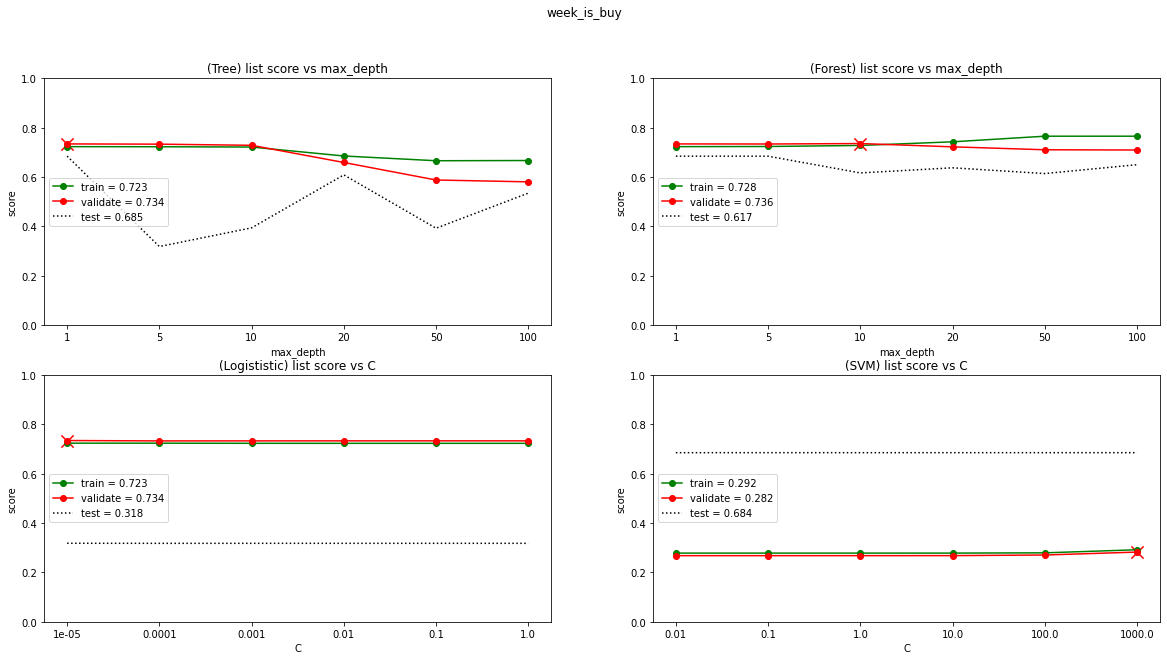

In [109]:
trainFromFile('out.csv', 'week_is_buy')
ests[2] = estimators

0: score_neg
1: score_neu
2: score_pos
3: score_compound
4: parent_score_neg
5: parent_score_neu
6: parent_score_pos
7: parent_score_compound
8: score
9: parent_score
10: submission_score
11: is_root
12: submission_ratio
13: parent_ratio
14: num_replies
15: day_increase
16: volume
week_is_strong_buy
Total length: 401598
---------------------------
Iteration 1
Training length: 50200
Validation length: 16733
Test length: 66933
trees...
forests...
logistic...
svm...
---------------------------
Iteration 2
Training length: 100400
Validation length: 33466
Test length: 66933
trees...
forests...
logistic...
svm...
---------------------------
Iteration 3
Training length: 150599
Validation length: 50200
Test length: 66933
trees...
forests...
logistic...
svm...
---------------------------
Iteration 4
Training length: 200799
Validation length: 66933
Test length: 66933
trees...
forests...
logistic...
svm...
---------------------------
Iteration 5
Training length: 250999
Validation length: 83666
Te

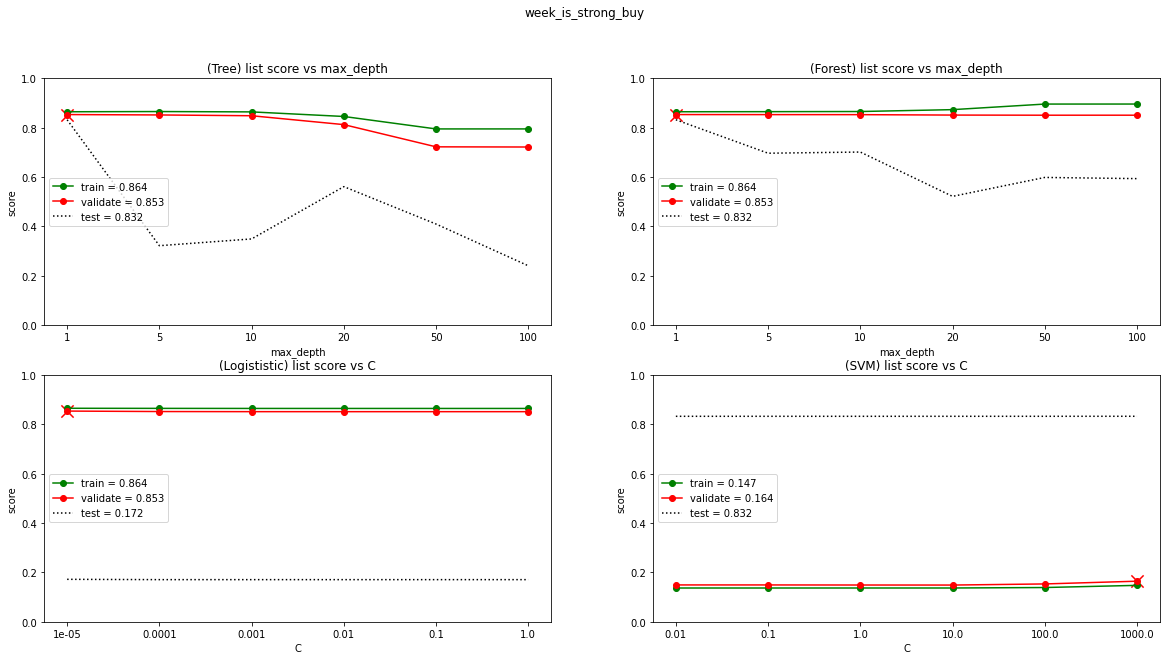

In [114]:
trainFromFile('out.csv', 'week_is_strong_buy')
ests[3] = estimators

In [ ]:
trainFromFile('out.csv', '4week_is_buy')
ests[4] = estimators

0: score_neg
1: score_neu
2: score_pos
3: score_compound
4: parent_score_neg
5: parent_score_neu
6: parent_score_pos
7: parent_score_compound
8: score
9: parent_score
10: submission_score
11: is_root
12: submission_ratio
13: parent_ratio
14: num_replies
15: day_increase
16: volume
4week_is_buy
Total length: 401598
---------------------------
Iteration 1
Training length: 50200
Validation length: 16733
Test length: 66933
trees...
forests...
logistic...
svm...
---------------------------
Iteration 2
Training length: 100400
Validation length: 33466
Test length: 66933
trees...
forests...


In [ ]:
trainFromFile('out.csv', '4week_is_strong_buy')
ests[5] = estimators

In [ ]:
trainFromFile('out2.csv', 'tomorrw_is_buy')
ests[6] = estimators

In [ ]:
trainFromFile('out2.csv', 'tomorrow_is_strong_buy')
ests[7] = estimators

In [ ]:
trainFromFile('out2.csv', 'week_is_buy')
ests[8] = estimators

In [ ]:
trainFromFile('out2.csv', 'week_is_strong_buy')
ests[9] = estimators

In [ ]:
trainFromFile('out2.csv', '4week_is_buy')
ests[10] = estimators

In [ ]:
trainFromFile('out2.csv', '4week_is_strong_buy')
ests[11] = estimators

In [ ]:

for yname,v in temp.items():
    print(yname)
    #for cla,ests in v.items():
        #print([score_estimators(X_trn,ytrn,e) for e in ests])
    #print(v['tree'])
    for e in v['tree'][0]:
        #print(e)
        plt.figure()
        sklearn.tree.plot_tree(e)
    break